# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

## Main Concept:
The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.

To measure density of a region:
- __Density at a point P:__ Number of points within a circle of Radius Eps (ϵ) from point P.
- __Dense Region:__ For each point in the cluster, the circle with radius ϵ contains at least minimum number of points (MinPts).

The Epsilon neighborhood of a point P in the database D is defined as:

                            N (p) = {q ∈ D | dist(p, q) ≤ ϵ}

Following the definition of dense region, a point can be classified as a
1. __Core Point__ if |N (p)|≥ MinPts. The Core Points, as the name suggests, lie usually within the interior of a cluster. 
2. __Border Point__ has fewer than MinPts within its ϵ-neighborhood (N), but it lies in the neighborhood of another core point. 
3. __Noise__ is any data point that is neither core nor border point.

![image1.png](images/dbscan_points.png)


__Directly Density Reachable:__ Data-point a is directly density reachable from a point b if -
1. |N (b)|≥ MinPts; i.e. b is a core point.
2. a ∈ N(b) i.e. a is in the epsilon neighborhood of b.

Considering a border point and a core point, we can understand that notion of directly density reachable is not symmetric, because even though the core point falls in the epsilon neighborhood of border point, the border point doesn’t have enough MinPts, and thus fail to satisfy both conditions.


__Density Reachable:__ Point a is density reachable from a point b with respect to ϵ and MinPts, if - for a chain of points $b_{1}$, $b_{2}$ ... $b_{n}$ where $b_{1}$ = b, $b_{n}$ = a, such that $b_{i+1}$ is directly density reachable from $b_{i}$. Density reachable is transitive in nature but, just like direct density reachable, it is not symmetric.

__Density Connected:__ There can be cases when 2 border points will belong to the same cluster but they don’t share a specific core point, then we say that they are density connected if, there exists a common core point, from which these borders points are density reachable. “A point a is density connected to a point b with respect to ϵ and MinPts, if there is a point c such that, both a and b are density reachable from c w.r.t. to ϵ and MinPts.”

![image1.png](images/dbscan_density_connected.png)

#### Advantages of DBSCAN:
1. Is great at separating clusters of high density versus clusters of low density within a given dataset.
2. Is great with handling outliers within the dataset.
3. It can discover clusters of arbitrary shape.
4. Efficient for large database, i.e. sample size more than few thousands.

#### Disadvantages of DBSCAN:
1. Does not work well when dealing with clusters of varying densities. While DBSCAN is great at separating high density clusters from low density clusters, DBSCAN struggles with clusters of similar density.
2. Struggles with high dimensionality data.

## Steps of DBSCAN Algorithm
1. The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the ϵ parameter.
2. If this point contains MinPts within ϵ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.
3. If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.
4. The above process continues until the density-connected cluster is completely found.
5. The process restarts with a new point which can be a part of a new cluster or labeled as noise.

#### Drawbacks of DBSCAN algorithm
- If the database has data points that form clusters of varying density, then DBSCAN fails to cluster the data points well, since the clustering depends on ϵ and MinPts parameter, they cannot be chosen separately for all clusters.
- If the data and features are not so well understood by a domain expert then, setting up ϵ and MinPts could be tricky and, may need comparisons for several iterations with different values of ϵ and MinPts.

### Libraries useful for DBSCAN

    To load dataset:    import pandas as pd
    Preprocessing:      from sklearn import preprocessing
    ploting graph:      import matplotlib.pyplot as plt
    numpy:              import numpy as np
    DBSCAN:             from sklearn.cluster import DBSCAN
    Agglomerative:      from sklearn.cluster import AgglomerativeClustering
    dendograms:         import scipy.cluster.hierarchy as shc
    for evaluations:    from sklearn import metrics
    plot the graph:     %matplotlib inline

In [60]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn import metrics
%matplotlib inline

### Load the "s1_modified " data

In [61]:
#load the dataset
df=pd.read_csv('s1_modified.csv')
df.columns=[0,1]
df=df[0:1000]
df1=df.copy(deep=True)
df


,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
995,817862,732248
996,844729,682981
997,846484,719360
998,793669,724513


### Q1. Perform pre-processing (if required)

In [62]:
from sklearn.preprocessing import StandardScaler
df[[0,1]]=StandardScaler().fit_transform(df[[0,1]])
df

,0,1
0,0.240454,-0.107338
1,0.250691,-0.070907
2,-0.166271,0.020305
3,-0.036171,-0.104743
4,0.067596,0.189036
...,...,...
995,1.173704,0.833698
996,1.336834,0.577981
997,1.347490,0.766803
998,1.026809,0.793550


### Q2. Apply DBSCAN Algorithm using Scikit-Learn taking eps=0.3 and mininimum samples = 50

In [63]:
clustering = DBSCAN(eps=0.3, min_samples=50, metric='euclidean').fit_predict(df)
clustering

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### Q3. Plot the clusters.

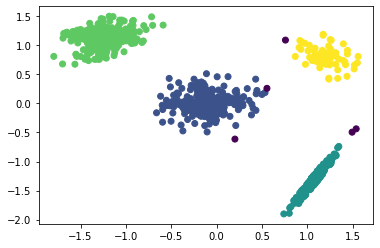

In [64]:
plt.scatter(df[[0]], df[[1]], c=clustering)


#### Different Metrics
- A clustering result satisfies __homogeneity__ if all of its clusters contain only data points which are members of a single class. 
- A clustering result satisfies __completeness__ if all the data points that are members of a given class are elements of the same cluster.
- The __mean silhouette score__ is calculated utilizing the mean intra- cluster distance between points, AND the mean nearest-cluster distance. For instance, a cluster with a lot of data points very close to each other (high density) AND is far away from the next nearest cluster (suggesting the cluster is very unique in comparison to the next closest), will have a strong silhouette score. A silhouette score ranges from -1 to 1, with -1 being the worst score possible and 1 being the best score. Silhouette scores of 0 suggest overlapping clusters.


### Q4. Find the estimated number of clusters, noise points and value of above mentioned metrices 

In [74]:
no_clusters=len(set(clustering))
if -1 in set(clustering):
    no_clusters-=1
print("No of cluster="+str(no_clusters))
print("No of noise points=",len(df1[clustering==-1].index))

print("Mean sil. score=",metrics.silhouette_score(df,clustering))

No of cluster=4
No of noise points= 5
Mean sil. score= 0.7994482581750948


### Q5. Detect and plot the outliers identified by DBSCAN

Outliers=
          0       1
155  657985  453405
258  716139  621721
327  870801  476330
379  878184  487392
932  749723  781756


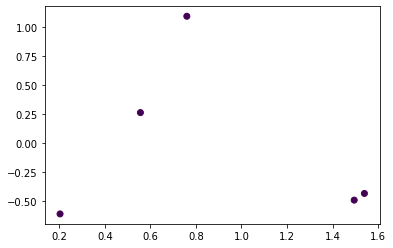

In [78]:
print("Outliers=")
print(df1[clustering==-1])
df2=df[clustering==-1]
plt.scatter(df2[[0]], df2[[1]], c=clustering[clustering==-1])

# Hierarchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. 

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

### Steps for agglomerative clustering

1. Treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer   representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem.

### Q6. Load dataset into a new data frame and perfrom the required steps of preprocessing

In [76]:
# load the data
df_new=pd.read_csv('s1_modified.csv')
df_new.columns=[0,1]
df_new=df_new[0:1000]
df_new1=df_new.copy(deep=True)
df_new


,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
995,817862,732248
996,844729,682981
997,846484,719360
998,793669,724513


In [77]:
# preprocessing
df_new[[0,1]]=StandardScaler().fit_transform(df_new[[0,1]])
df_new

,0,1
0,0.240454,-0.107338
1,0.250691,-0.070907
2,-0.166271,0.020305
3,-0.036171,-0.104743
4,0.067596,0.189036
...,...,...
995,1.173704,0.833698
996,1.336834,0.577981
997,1.347490,0.766803
998,1.026809,0.793550


### Q7. Apply agglomerative clustering with single link

In [80]:
agg_clustering = AgglomerativeClustering(linkage='single').fit_predict(df_new)
agg_clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### Q8. Plot the clusters

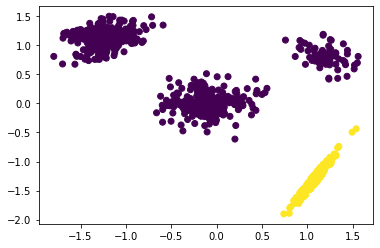

In [82]:
plt.scatter(df_new[[0]], df_new[[1]], c=agg_clustering)

### Q9. Plot the dendograms using single link clustering

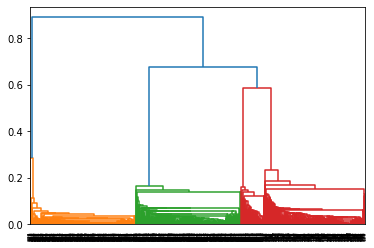

In [90]:
dend=shc.dendrogram(shc.linkage(df_new, method='single'))
plt.show()

### Q10. Apply agglomerative clustering using complete link and wards method and plot their dendograms

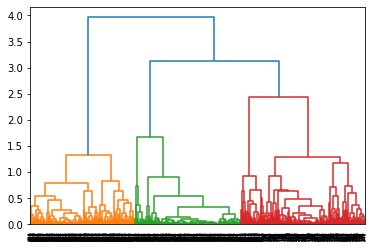

In [91]:
dend=shc.dendrogram(shc.linkage(df_new, method='complete'))
plt.show()

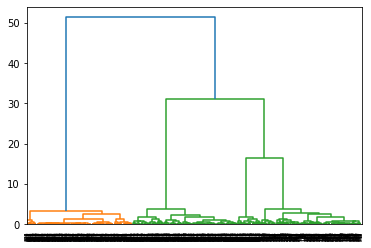

In [92]:
dend=shc.dendrogram(shc.linkage(df_new, method='ward'))
plt.show()